In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import scoring as sc
import scheduler as sch

%load_ext autoreload
%autoreload 2

In [2]:
# read json file patient_config.json
with open('patient_config.json') as f:
    patient_config = json.load(f)
doses = [1, 0.75, 0.5]
plans = [(t1, t2, t3, t4) for t1 in doses for t2 in doses for t3 in doses for t4 in doses]

In [3]:
start_time = time.time()
print(f"Testing {len(plans)} treatment schedules.")

sols = [sc.score(patient_config, plan) for plan in plans]
sols = [sol for sol in sols if sol is not None]

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Found {len(sols)} feasible treatment schedules.")
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Testing 81 treatment schedules.
Found 16 feasible treatment schedules.
Elapsed Time: 14.2007 seconds


In [4]:
sols[0]

{'plan': (0.75, 0.75, 0.75, 0.75),
 'schedule': array([[  1.  ,   0.75,   0.  ,  21.  ],
        [  1.  ,   0.75,  28.  ,  49.  ],
        [  1.  ,   0.75,  63.  ,  84.  ],
        [  1.  ,   0.75,  98.  , 119.  ],
        [  2.  ,   0.75, 133.  , 154.  ],
        [  2.  ,   0.75, 168.  , 189.  ],
        [  2.  ,   0.75, 203.  , 224.  ],
        [  2.  ,   0.75, 238.  , 259.  ],
        [  3.  ,   0.75, 273.  , 294.  ],
        [  3.  ,   0.75, 308.  , 329.  ],
        [  3.  ,   0.75, 343.  , 364.  ],
        [  3.  ,   0.75, 378.  , 399.  ],
        [  3.  ,   0.75, 413.  , 434.  ],
        [  4.  ,   0.75, 448.  , 476.  ],
        [  4.  ,   0.75, 490.  , 518.  ],
        [  4.  ,   0.75, 532.  , 560.  ],
        [  4.  ,   0.75, 574.  , 602.  ],
        [  4.  ,   0.75, 616.  , 644.  ]]),
 'toxicity_sol': array([0.49875   , 0.9725625 , 1.42268437, 1.85030016, 2.25653515,
        2.64245839, 3.00908547, 3.3573812 , 3.68826214, 4.00259903,
        4.30121908, 4.58490813, 4.85441272,

In [5]:
scored_plans = [[*sol["plan"], sc.score_burden(sol["burden_sol"]), sc.score_toxicity(sol["toxicity_sol"]), sch.duration(sol["schedule"])] for sol in sols]
df_sp = pd.DataFrame(scored_plans, columns = ["S1", "S2", "S3", "S4", "burden", "toxicity", "total_time"])
df_sp["total_time"] = df_sp["total_time"].astype(int)
df_sp.head()

,S1,S2,S3,S4,burden,toxicity,total_time
0,0.75,0.75,0.75,0.75,2.290923e+07,6.081025,644
1,0.75,0.75,0.75,0.50,1.183751e+08,5.380641,616
2,0.75,0.75,0.50,0.75,2.603778e+07,5.556813,609
3,0.75,0.75,0.50,0.50,1.345478e+08,4.856429,581
4,0.75,0.50,0.75,0.75,2.818298e+07,5.661656,616


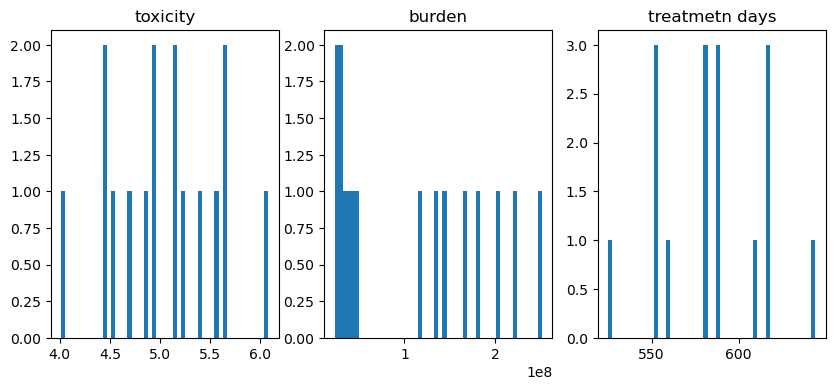

In [6]:
# plot two histograms for cost and benefit
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].hist(df_sp["toxicity"], bins=50)
ax[0].set_title("toxicity");
ax[1].hist(df_sp["burden"], bins=50)
ax[1].set_title("burden");
ax[2].hist(df_sp["total_time"], bins=50)
ax[2].set_title("treatmetn days");

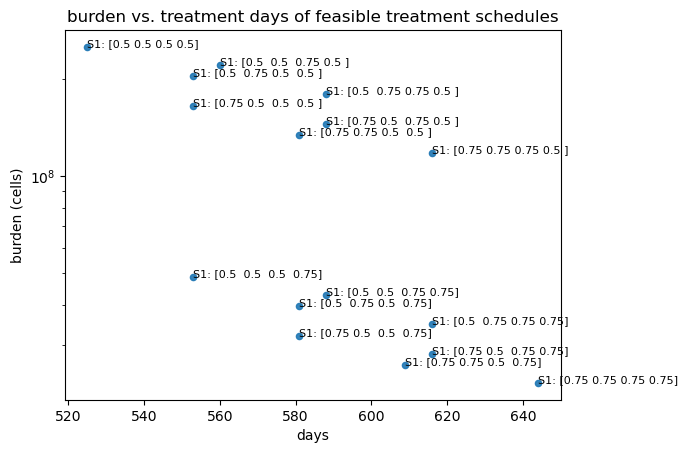

In [19]:
plt.scatter(df_sp["total_time"], df_sp["burden"], s=20, alpha=0.9)

# Add compact labels
for i in range(df_sp.shape[0]):
    label = f"{df_sp.iloc[i][['S1','S2','S3','S4']].values}"
    plt.text(df_sp.iloc[i]["total_time"], df_sp.iloc[i]["burden"], label, fontsize=8)

# set y to log
plt.yscale("log")
plt.xlabel("days")
plt.ylabel("burden (cells)")
plt.title("burden vs. treatment days of feasible treatment schedules");

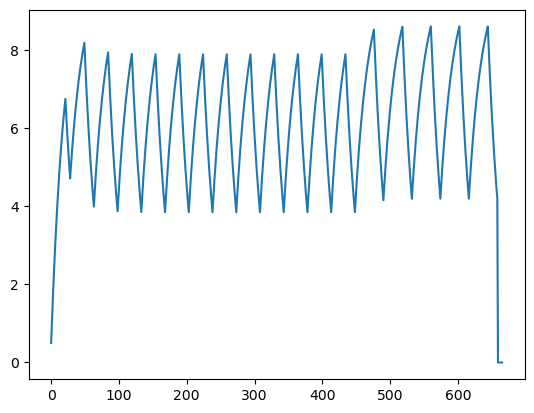

In [8]:
for i in range(1):
    plt.plot(sols[i]["toxicity_sol"])

In [9]:
df_sp

,S1,S2,S3,S4,burden,toxicity,total_time
0,0.75,0.75,0.75,0.75,2.290923e+07,6.081025,644
1,0.75,0.75,0.75,0.50,1.183751e+08,5.380641,616
2,0.75,0.75,0.50,0.75,2.603778e+07,5.556813,609
3,0.75,0.75,0.50,0.50,1.345478e+08,4.856429,581
4,0.75,0.50,0.75,0.75,2.818298e+07,5.661656,616
5,0.75,0.50,0.75,0.50,1.456252e+08,4.961272,588
6,0.75,0.50,0.50,0.75,3.203597e+07,5.137444,581
7,0.75,0.50,0.50,0.50,1.655371e+08,4.437060,553
8,0.50,0.75,0.75,0.75,3.482151e+07,5.656663,616
9,0.50,0.75,0.75,0.50,1.799274e+08,4.956279,588


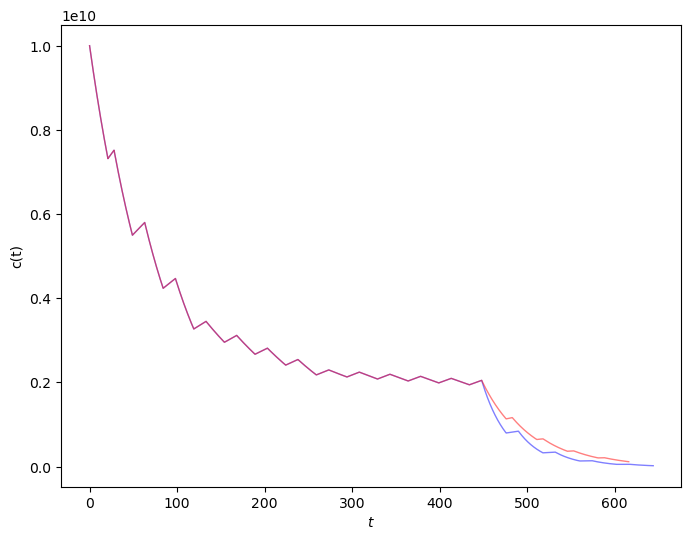

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("$t$")
ax.set_ylabel("c(t)")
sol = sols[0]["burden_sol"]
ax.plot(sol .t, sol .y.T[:, 0], color="blue", lw=1, alpha=0.5);
sol = sols[1]["burden_sol"]
ax.plot(sol .t, sol .y.T[:, 0], color="red", lw=1, alpha=0.5);

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                go.Scatter(
                    x=df_sp["total_time"],
                    y=df_sp["burden"],
                    mode='markers',
                    marker=dict(size=20, opacity=0.5)
                )
            ],
            'layout': go.Layout(
                title='burden vs. treatment days of feasible treatment schedules',
                xaxis={'title': 'days'},
                yaxis={'title': 'burden (cells)', 'type': 'log'},
                hovermode='closest'
            )
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)